In [34]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
import time
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm 

In [35]:
df = pd.read_csv("DATASET-balanced.csv")

In [36]:
df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,FAKE
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,FAKE
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,FAKE
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,FAKE
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,FAKE


In [37]:
df.describe()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,...,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000
mean,0.421925,0.037894,2719.201373,3050.299988,4977.617722,0.070821,-382.562312,145.056311,-24.699932,21.311292,...,-2.242488,-4.439806,-1.657739,-2.107442,-2.606924,-1.641709,-3.320340,-3.117110,-2.754034,-4.427346
std,0.069392,0.028071,1066.754739,872.258653,2170.158448,0.039292,79.593413,36.188506,27.728976,22.480432,...,7.726415,6.614913,5.121732,5.347953,4.909579,5.627377,4.597079,4.976511,4.957660,5.478806
min,0.200353,0.000043,756.163229,1096.903152,1063.964279,0.015504,-1055.002197,-83.816765,-132.491104,-47.770000,...,-29.636639,-30.168062,-19.717999,-21.553347,-28.876045,-20.307486,-22.753056,-19.623880,-23.890470,-25.099829
25%,0.372330,0.015098,2062.875836,2569.289971,3448.144178,0.045749,-432.928848,120.522711,-35.550402,3.635681,...,-6.863236,-8.233070,-5.178427,-5.642066,-5.760252,-4.868709,-6.435052,-5.862841,-5.514250,-7.463774
50%,0.417708,0.031870,2579.963841,3055.863462,4683.958018,0.060237,-365.756241,145.970162,-19.164229,22.218458,...,-2.438328,-4.186015,-1.530670,-2.320350,-2.447045,-0.862829,-3.230387,-2.957088,-2.726495,-3.839427
75%,0.467741,0.054046,3283.857559,3581.271953,6211.301553,0.085149,-321.772781,168.321331,-6.235028,37.017731,...,2.349474,-0.266044,1.794835,1.569430,0.837690,2.043472,-0.293191,0.068411,0.495779,-0.787292
max,0.707202,0.168958,17685.006690,7836.844404,21130.544670,0.812480,-193.430145,284.727997,67.475792,86.585747,...,28.890339,22.552883,19.462509,21.356049,13.319826,19.329521,18.873386,17.924467,11.985058,11.764109


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         11778 non-null  float64
 1   rms                 11778 non-null  float64
 2   spectral_centroid   11778 non-null  float64
 3   spectral_bandwidth  11778 non-null  float64
 4   rolloff             11778 non-null  float64
 5   zero_crossing_rate  11778 non-null  float64
 6   mfcc1               11778 non-null  float64
 7   mfcc2               11778 non-null  float64
 8   mfcc3               11778 non-null  float64
 9   mfcc4               11778 non-null  float64
 10  mfcc5               11778 non-null  float64
 11  mfcc6               11778 non-null  float64
 12  mfcc7               11778 non-null  float64
 13  mfcc8               11778 non-null  float64
 14  mfcc9               11778 non-null  float64
 15  mfcc10              11778 non-null  float64
 16  mfcc

In [39]:
df.columns

Index(['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'LABEL'],
      dtype='object')

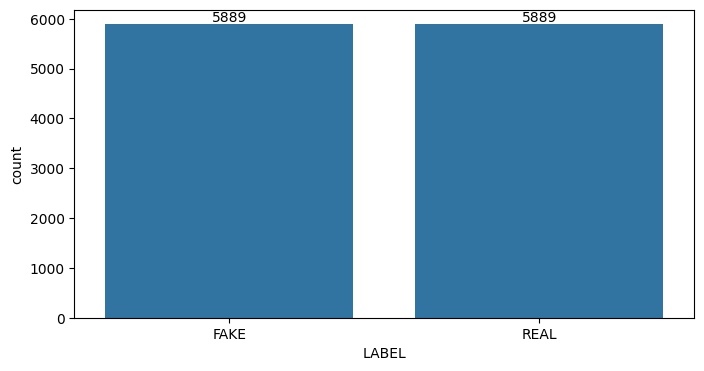

In [40]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='LABEL')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1, int(p.get_height()), 
             ha='center', va='bottom')

plt.show()

In [41]:
label_encoder = LabelEncoder()
df['LABEL'] = label_encoder.fit_transform(df['LABEL'])

In [42]:
y = df['LABEL']
X = df.drop('LABEL', axis = 1)

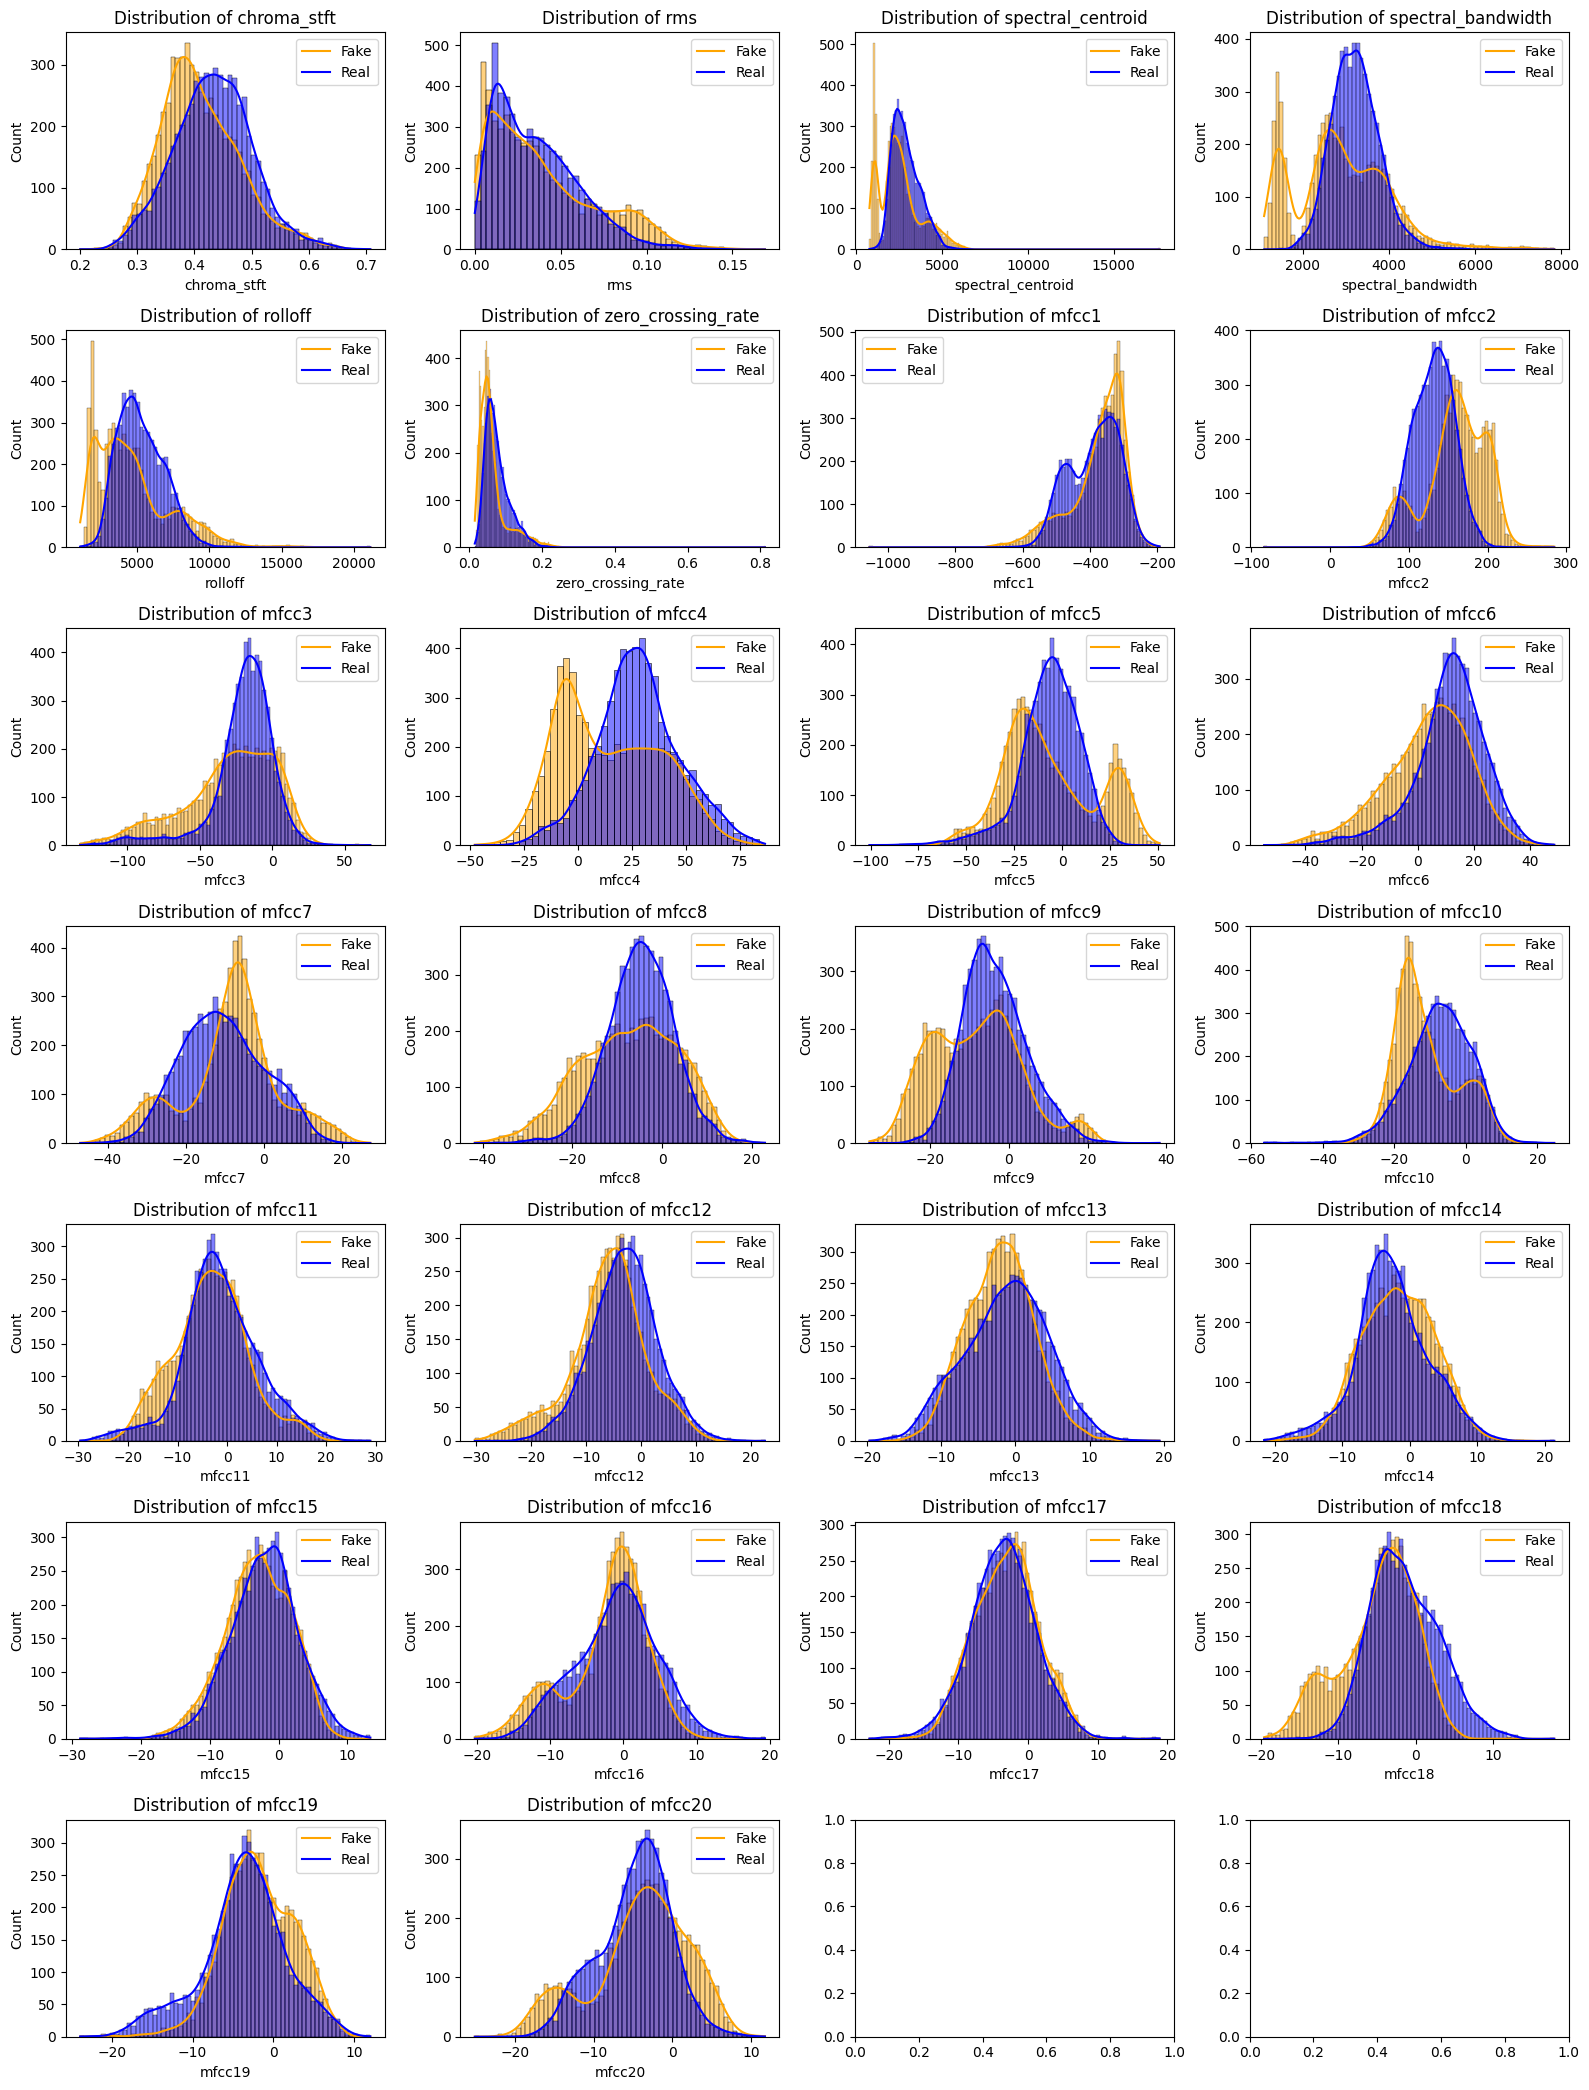

In [43]:
num_cols = len(X.columns)
nfig_per_row = 4
num_rows = (num_cols // nfig_per_row) + (num_cols % nfig_per_row > 0)

fig, axes = plt.subplots(num_rows, nfig_per_row, figsize=(nfig_per_row * 4, num_rows * 3))
axes = axes.flatten()

for i, column in enumerate(X):
    sns.histplot(data=df, x=column, hue='LABEL', kde=True, palette=['blue', 'orange'], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(labels=['Fake', 'Real'])

plt.tight_layout()
plt.show()

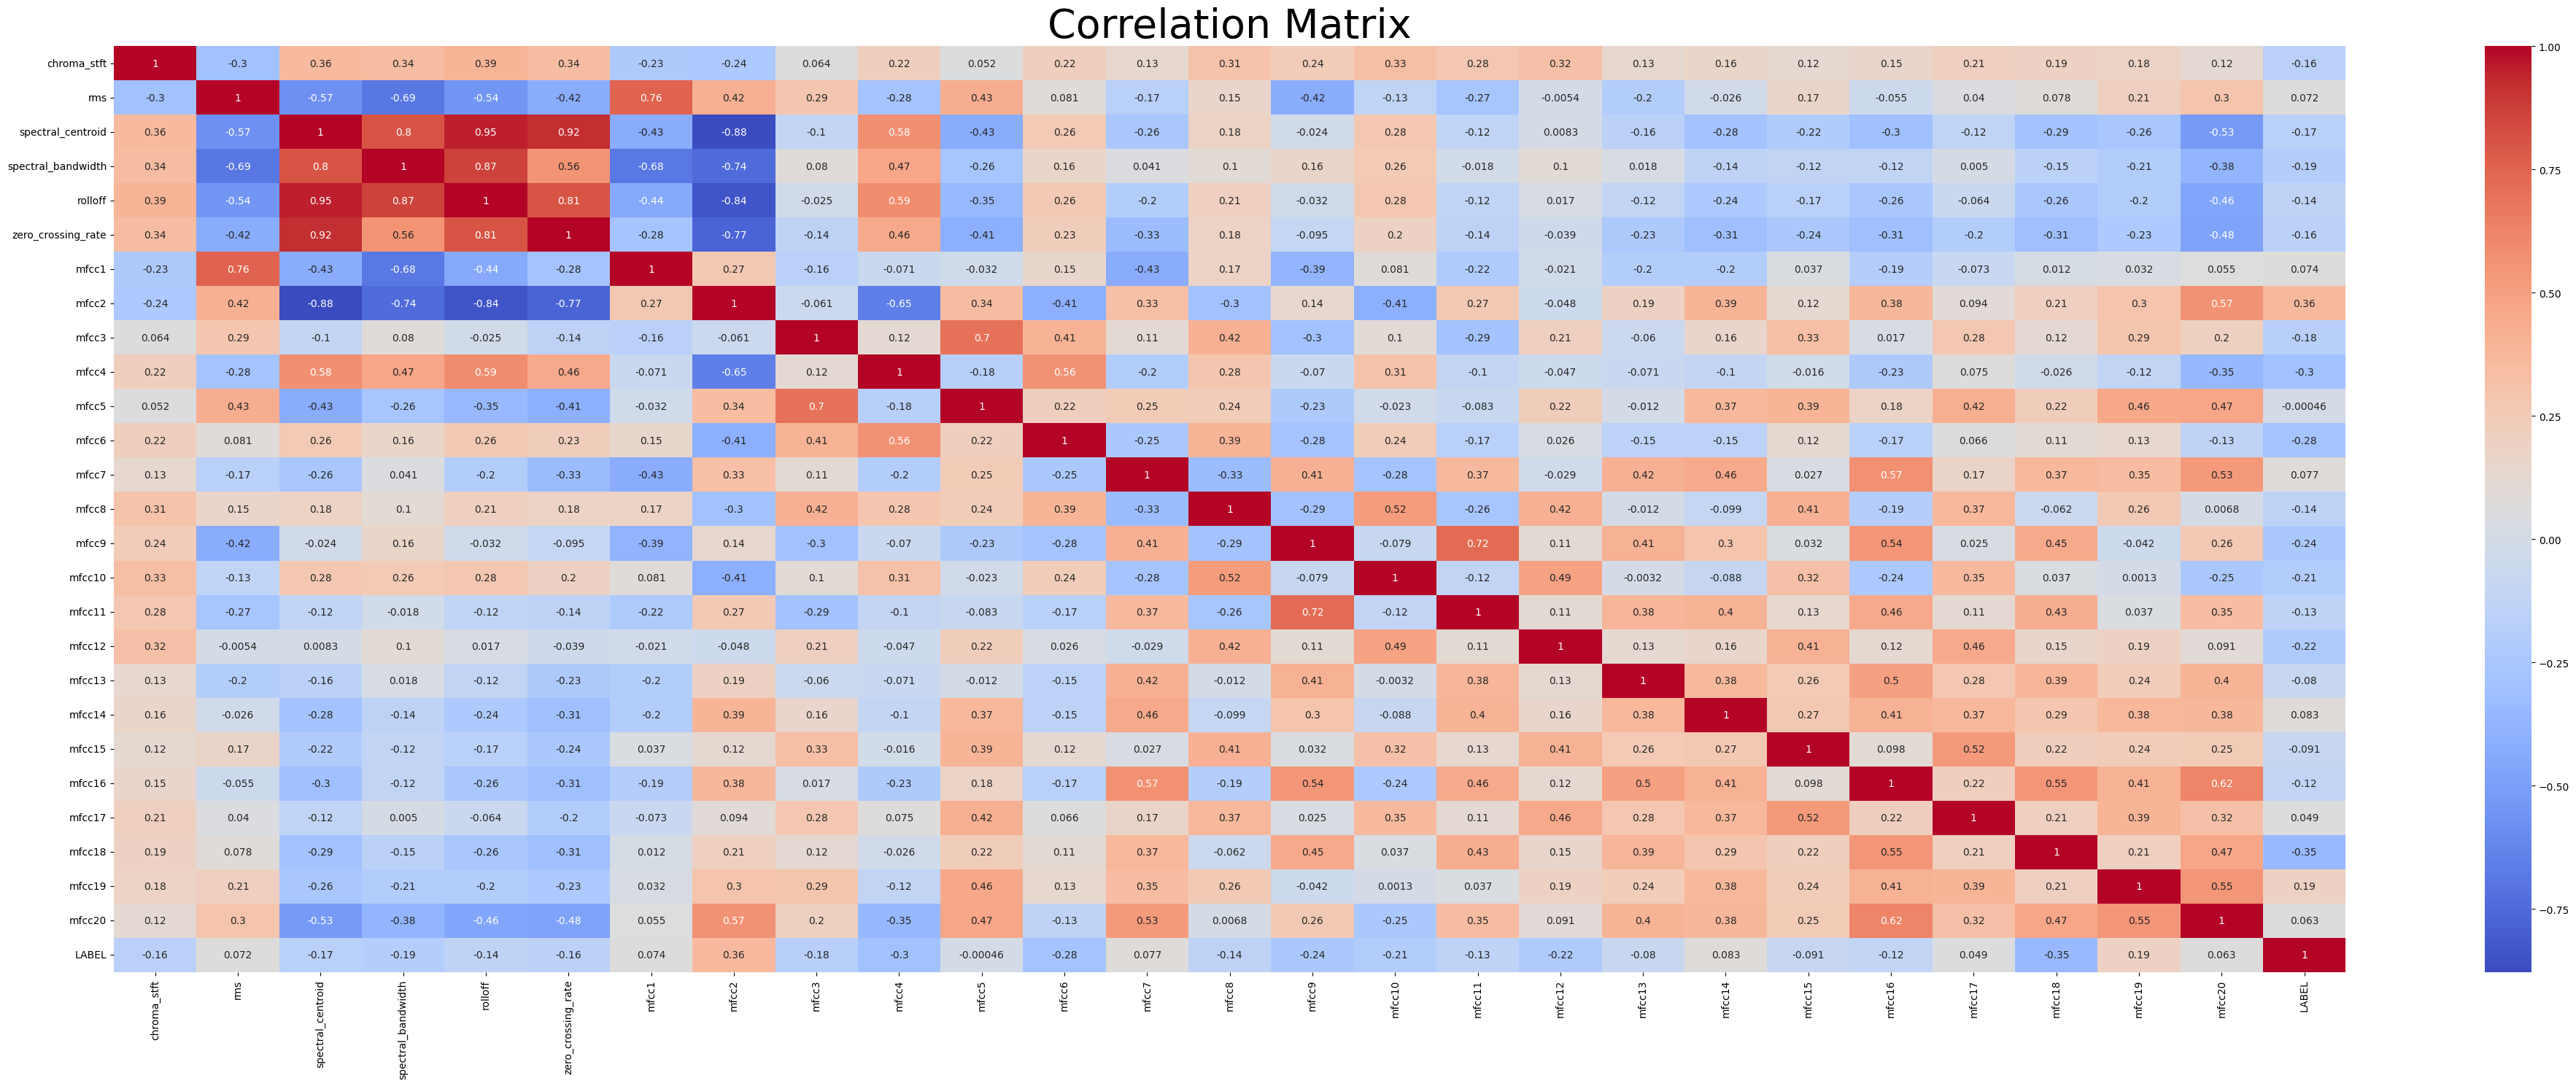

In [44]:
correlation_matrix = df.corr()
plt.figure(figsize=(40, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot = True)
plt.title('Correlation Matrix',
          fontsize = 40)
plt.tight_layout()
plt.show()

In [45]:
X.iloc[:, :] = MinMaxScaler().fit_transform(X)

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y.values, test_size=0.2, shuffle=True, stratify=y.values, random_state=42)

###  XGBoost Hyperparams optimization

In [47]:
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform GridSearchCV with 10-fold cross-validation (like in the paper)
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=10, n_jobs=32, verbose=1)
xgb_grid_search.fit(X_train, y_train)

print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")
best_xgb_model = xgb_grid_search.best_estimator_

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


### RF Hyperparams optimization

In [50]:
rf_model = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2', 'sqrt']
}

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=10, n_jobs=18, verbose=1)
rf_grid_search.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
best_rf_model = rf_grid_search.best_estimator_

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Evaluate XGB and RF on val set

In [51]:
xgb_predictions = best_xgb_model.predict(X_val)
rf_predictions = best_rf_model.predict(X_val)

# Evaluate accuracy
xgb_accuracy = accuracy_score(y_val, xgb_predictions)
rf_accuracy = accuracy_score(y_val, rf_predictions)

print(f"XGBoost accuracy: {xgb_accuracy:.4f}")
print(f"Random Forest accuracy: {rf_accuracy:.4f}")

XGBoost accuracy: 0.9932
Random Forest accuracy: 0.9924


### 10 Fold Cross Val like in the paper

In [52]:
def compute_cv_runtime(model, X_train, y_train, cv=10):
    start_time = time.time()
    cv_pred = cross_val_predict(model, X_train, y_train, cv=cv)
    mean_runtime_per_element = (time.time() - start_time) / len(X_train)    
    return cv_pred, mean_runtime_per_element

In [53]:
xgb_pred, xgb_runtime = compute_cv_runtime(best_xgb_model, X_train, y_train, cv=10)
rf_pred, rf_runtime = compute_cv_runtime(best_rf_model, X_train, y_train, cv=10)

print(f"XGB Runtime 10F Val: {xgb_runtime}")
print(f"RF Runtime 10F Val: {rf_runtime}")

XGB Runtime 10F Val: 0.0011983299882921588
RF Runtime 10F Val: 0.025397746382283953


In [54]:
def compute_metrics(y_train, predictions):
    accuracy = accuracy_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    recall = recall_score(y_train, predictions)
    f1 = f1_score(y_train, predictions)
    mcc = matthews_corrcoef(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictions)
    
    return accuracy, precision, recall, f1, mcc, roc_auc

In [55]:
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_mcc, xgb_roc_auc = compute_metrics(y_train, xgb_pred)
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_mcc, rf_roc_auc = compute_metrics(y_train, rf_pred)

In [56]:
results_df = pd.DataFrame({
    "Model": ["Tested XGBoost", "Tested RandomForest"],
    "Accuracy": [xgb_accuracy, rf_accuracy],
    "Precision": [xgb_precision, rf_precision],
    "Recall": [xgb_recall, rf_recall],
    "F1": [xgb_f1, rf_f1],
    "MCC": [xgb_mcc, rf_mcc],
    "ROC-AUC": [xgb_roc_auc, rf_roc_auc],
    "Inference Time(ms)": [xgb_runtime, rf_runtime]
})

In [57]:
paper_results = pd.DataFrame({
    "Model": ["Paper XGBoost", "Paper RandomForest"],
    "Accuracy": [0.993, 0.989],
    "Precision": [0.995, 0.995],
    "Recall": [0.991, 0.983],
    "F1": [0.993, 0.989],
    "MCC": [0.986, 0.978],
    "ROC-AUC": [0.993, 0.989],
    "Inference Time(ms)": [0.004, 0.057]
})

In [58]:
results_df

,Model,Accuracy,Precision,Recall,F1,MCC,ROC-AUC,Inference Time(ms)
0,Tested XGBoost,0.992358,0.994668,0.990023,0.992340,0.984727,0.992358,0.001198
1,Tested RandomForest,0.985566,0.992253,0.978773,0.985467,0.971221,0.985566,0.025398


In [59]:
comparison_df = pd.concat([results_df, paper_results])
comparison_df

,Model,Accuracy,Precision,Recall,F1,MCC,ROC-AUC,Inference Time(ms)
0,Tested XGBoost,0.992358,0.994668,0.990023,0.992340,0.984727,0.992358,0.001198
1,Tested RandomForest,0.985566,0.992253,0.978773,0.985467,0.971221,0.985566,0.025398
0,Paper XGBoost,0.993000,0.995000,0.991000,0.993000,0.986000,0.993000,0.004000
1,Paper RandomForest,0.989000,0.995000,0.983000,0.989000,0.978000,0.989000,0.057000


Result are similar between our implementation and the paper. Lets see if the model generalize to other dataset with the same preprocessing

### Fake or Not Dataset (FoR) for Test-To-Speech (TTS) type of audio spoofing

As we can see ML is effective on the DEEP-VOICE dataset, which is RCV based voice modification type of spoofing. Lets see is the model generalize to a TTS type of spoofing. We will use the Fake or Not dataset. This dataset is composed of synthetic audios vs real one. We will use the 2-sec version of the dataset re-recorded on non professional audio (smartphone, computer mic) to be closer on a real-world spoofing attack. 
More infos on the dataset : https://bil.eecs.yorku.ca/wp-content/uploads/2020/01/FoR-Dataset_RR_VT_final.pdf

We will us the same method of preprocessing described in the DEEP-VOICE paper. We will cut each audio in 1 sec lenght audio, then extract the following features : 
- chroma stft 
- rms 
- spectral centroid
- spectral rolloff 
- zero crossing rate
- MFCC (1 to 20)

In [60]:
def extract_features(y, sr):
    features = {}
    features["chroma_stft"] = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    features["rms"] = np.mean(librosa.feature.rms(y=y))
    features["spectral_centroid"] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    features["spectral_bandwidth"] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    features["rolloff"] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    features["zero_crossing_rate"] = np.mean(librosa.feature.zero_crossing_rate(y=y))
    
    # Extract MFCCs -> 20 
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for i in range(20):
        features[f"mfcc{i+1}"] = np.mean(mfccs[i, :])
    
    return features

In [61]:
def process_folder(folder_path, label):
    data = []
    
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder_path, filename)
            y, sr = librosa.load(file_path, sr=44100)  # Load audio at 44.1 kHz
            
            # Split into 1-second segments
            segment_length = sr
            for i in range(2):  # Two segments per file
                start = i * segment_length
                end = (i + 1) * segment_length
                
                if end > len(y):  # Avoid index errors
                    break
                
                segment_y = y[start:end]
                features = extract_features(segment_y, sr)
                features["LABEL"] = label
                
                data.append(features)
    return data


In [62]:
def load_audio_files(base_path):
    data = []
    
    fake_path = os.path.join(base_path, "fake")
    if os.path.exists(fake_path):
        data.extend(process_folder(fake_path, 0))  # Fake label

    real_path = os.path.join(base_path, "real")
    if os.path.exists(real_path):
        data.extend(process_folder(real_path, 1))  # Real label
    
    df = pd.DataFrame(data)
    return df

In [112]:
folder_path = "C:\\Users\\Ewen BERNARD\\Documents\\GitHub\\UncovAI\\for-2seconds\\training"
df_for = load_audio_files(folder_path)

  0%|          | 17/6978 [00:01<11:54,  9.75it/s]c:\Users\Ewen BERNARD\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
100%|██████████| 6978/6978 [12:17<00:00,  9.46it/s]


In [120]:
folder_path = "C:\\Users\\Ewen BERNARD\\Documents\\GitHub\\UncovAI\\for-2seconds\\testing"
df_for_test = load_audio_files(folder_path)

100%|██████████| 544/544 [00:56<00:00,  9.68it/s]


In [121]:
df_for.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.329216,0.222561,1327.090564,1389.235563,2591.657126,0.032631,-256.243652,176.048721,-20.571753,36.506229,...,-14.654196,-7.648771,0.655517,-2.646529,-9.104595,1.816010,-0.651239,-8.318714,0.905644,0
1,0.433612,0.149915,1293.000628,1417.232490,2340.188914,0.038956,-293.234497,176.098846,-2.278938,24.224693,...,-4.434901,1.105356,-2.073980,-1.042939,2.482889,6.114441,-1.990408,-4.157442,5.881031,0
2,0.403201,0.178985,1158.205530,1123.789788,2098.868534,0.039904,-301.963959,185.110962,5.119674,5.959318,...,-11.894322,-16.590717,-5.635931,-2.842050,-11.456542,-6.561166,4.522896,-1.840246,-11.593560,0
3,0.358429,0.182980,929.531849,1004.329007,1854.330550,0.027164,-292.292572,198.315369,11.866449,17.708773,...,-11.834080,-20.517729,-8.659452,-0.124156,-13.392533,-12.348297,5.768229,0.962790,-13.602243,0
4,0.338584,0.192044,1202.026996,1023.551899,2196.139211,0.036745,-275.202057,211.993362,-20.206131,-7.543219,...,0.773259,-13.380183,-12.280666,-3.268682,-7.052856,-6.248165,-1.169622,-8.589787,-11.955201,0


In [122]:
label_encoder_for = LabelEncoder()
df_for['LABEL'] = label_encoder_for.fit_transform(df_for['LABEL'])

In [123]:
y_for = df_for['LABEL']
X_for = df_for.drop('LABEL', axis = 1)

In [124]:
label_encoder_for = LabelEncoder()
df_for_test['LABEL'] = label_encoder_for.fit_transform(df_for_test['LABEL'])
y_for_test = df_for_test['LABEL']
X_for_test = df_for_test.drop('LABEL', axis = 1)


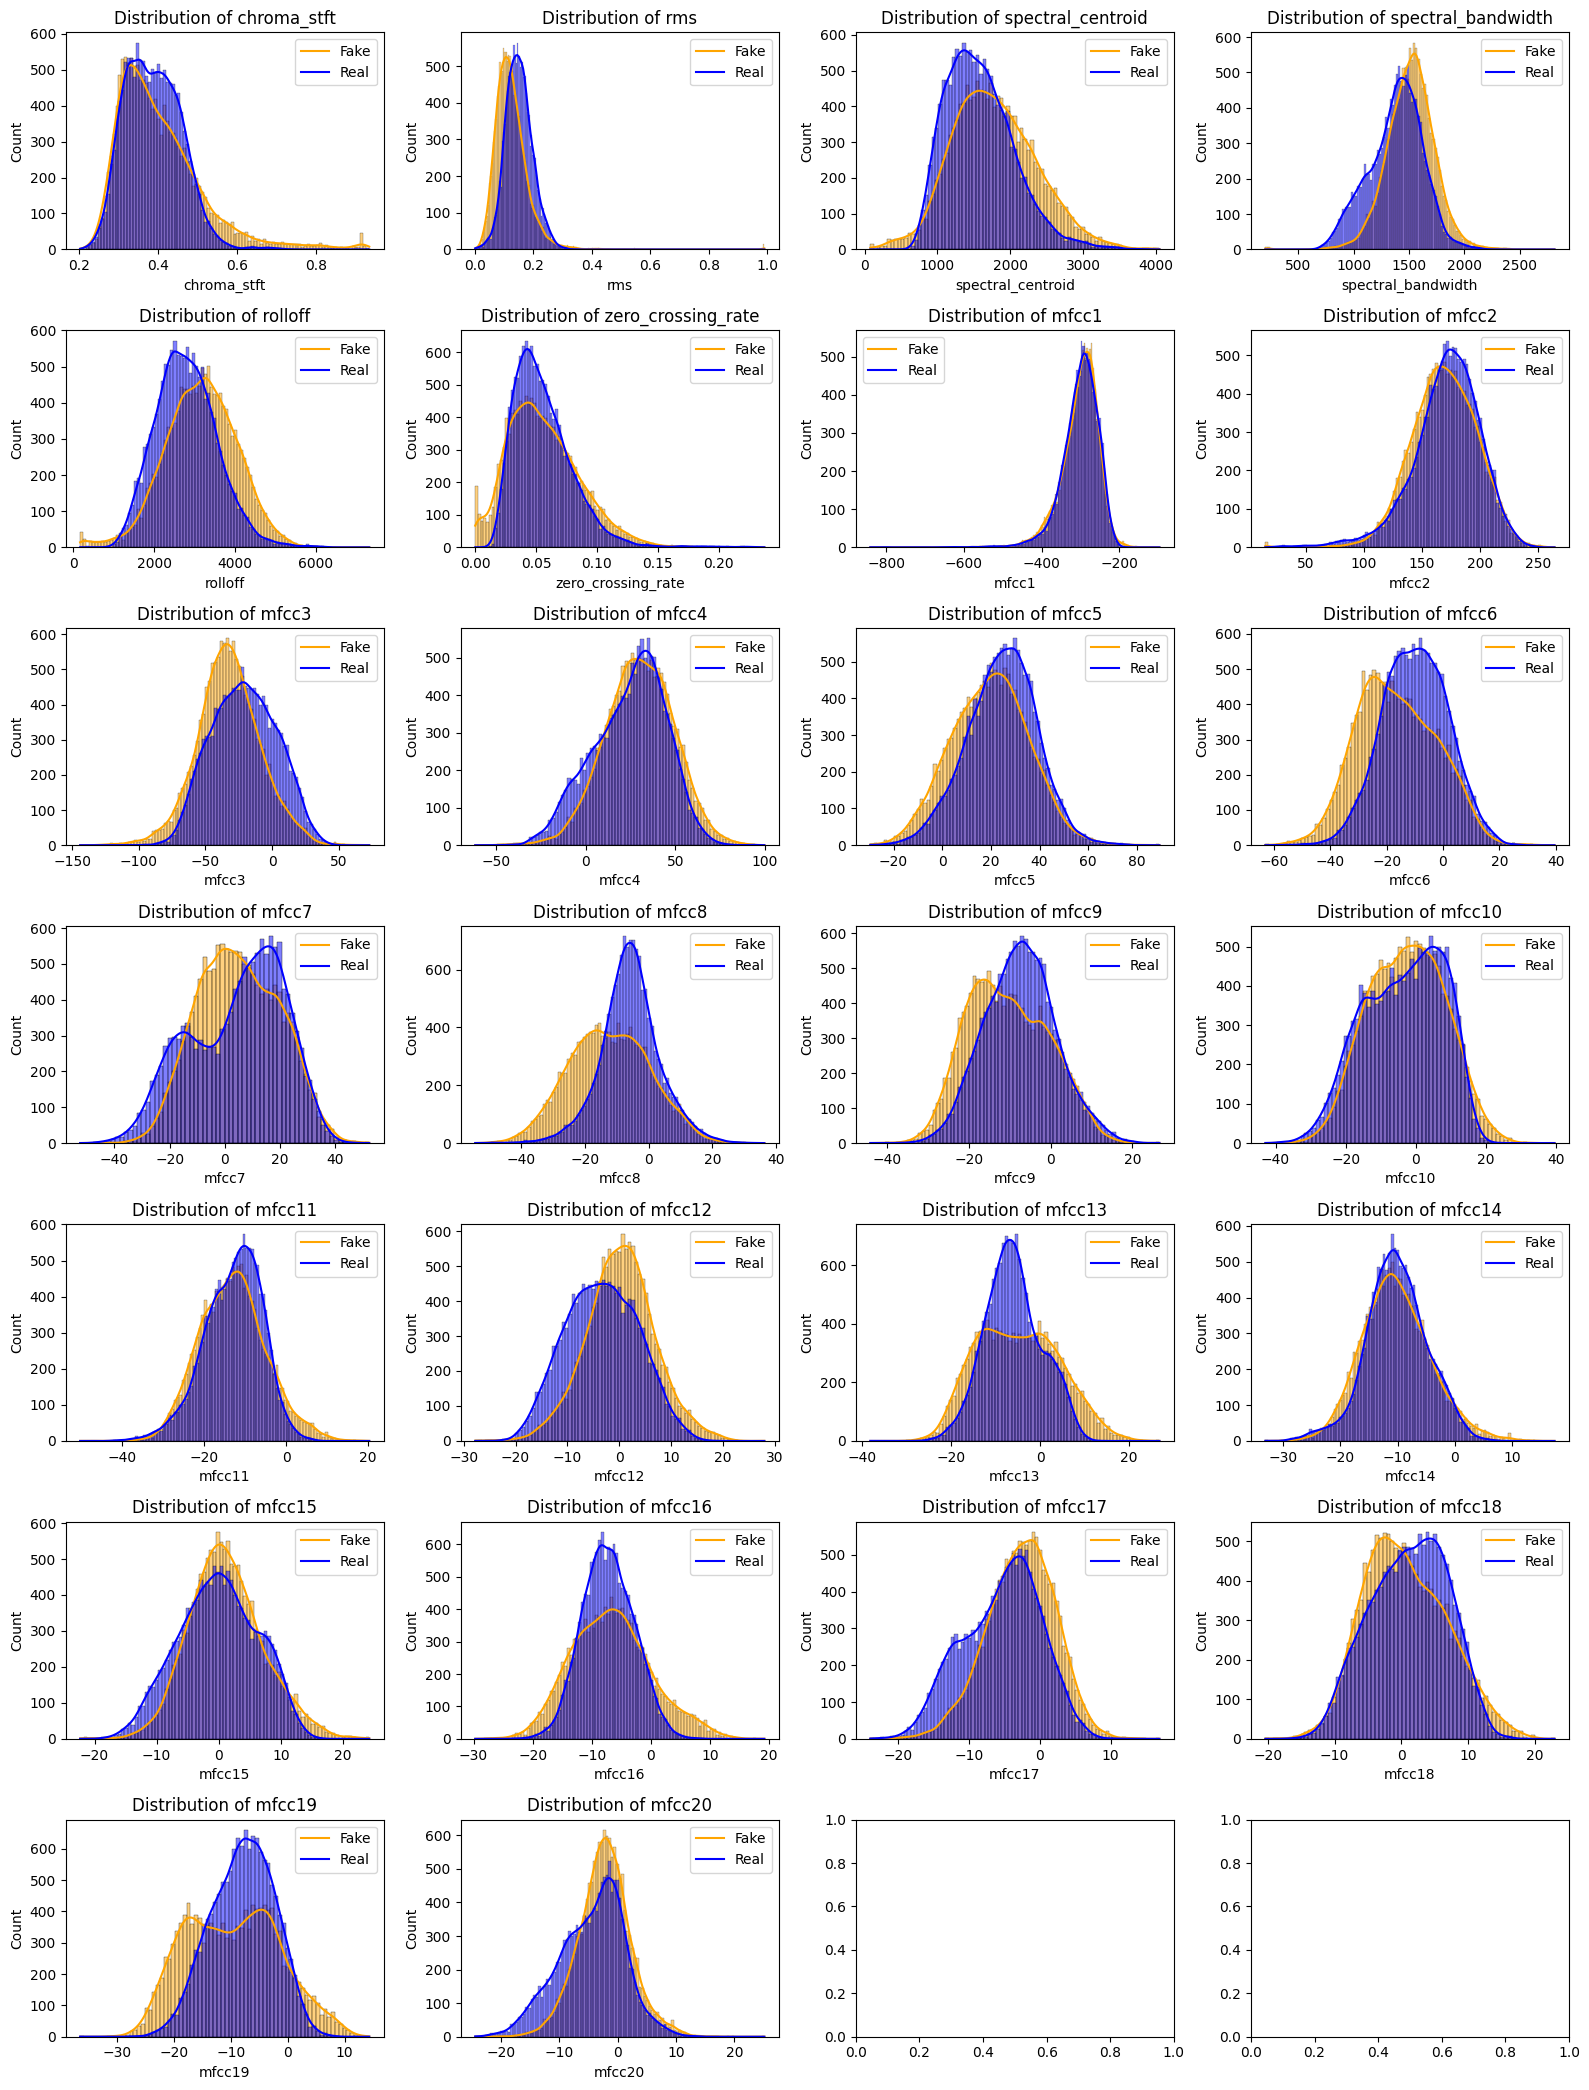

In [139]:
num_cols = len(X_for.columns)
nfig_per_row = 4
num_rows = (num_cols // nfig_per_row) + (num_cols % nfig_per_row > 0)

fig, axes = plt.subplots(num_rows, nfig_per_row, figsize=(nfig_per_row * 4, num_rows * 3))
axes = axes.flatten()

for i, column in enumerate(X_for):
    sns.histplot(data=df_for, x=column, hue='LABEL', kde=True, palette=['blue', 'orange'], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(labels=['Fake', 'Real'])

plt.tight_layout()
plt.show()

Distribution are way different than the first dataset. Low hope for the model to be able to generalize well on this dataset without training. But after training performances should be great as distribution for each features are discriminative enought between fake and real

In [125]:
X_for.iloc[:, :] = MinMaxScaler().fit_transform(X_for)
X_for_test.iloc[:, :] = MinMaxScaler().fit_transform(X_for_test)

In [69]:
xgb_pred_for = best_xgb_model.predict(X_for)
rf_pred_for = best_rf_model.predict(X_for)

In [71]:
xgb_accuracy_for = accuracy_score(y_for, xgb_pred_for)
rf_accuracy_for = accuracy_score(y_for, rf_pred_for)

print(f"XGBoost accuracy: {xgb_accuracy_for:.4f}")
print(f"Random Forest accuracy: {rf_accuracy_for:.4f}")

XGBoost accuracy: 0.3971
Random Forest accuracy: 0.5087


Do not generalize to another dataset. performances worst than random

In [113]:
#X_train_for, X_val_for, y_train_for, y_val_for = train_test_split(X_for, y_for.values, test_size=0.2, shuffle=True, stratify=y_for.values, random_state=42)

In [72]:
xgb_model_for = xgb.XGBClassifier(eval_metric='mlogloss')

xgb_param_grid_for = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_grid_search_for = GridSearchCV(xgb_model_for, xgb_param_grid, cv=10, n_jobs=32, verbose=1)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.9}


In [126]:
xgb_grid_search_for.fit(X_for, y_for)

print(f"Best parameters for XGBoost: {xgb_grid_search_for.best_params_}")
best_xgb_model_for = xgb_grid_search_for.best_estimator_

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


c:\Users\Ewen BERNARD\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.9}


In [129]:
xgb_for_test_pred = best_xgb_model_for.predict(X_for_test)

In [130]:
len(xgb_pred_for)

2176

In [132]:
xgb_accuracy_for, xgb_precision_for, xgb_recall_for, xgb_f1_for, xgb_mcc_for, xgb_roc_auc_for = compute_metrics(y_for_test, xgb_pred_for)

In [133]:
results_df = pd.DataFrame({
    "Model": ["Tested XGBoost"],
    "Accuracy": [xgb_accuracy_for],
    "Precision": [xgb_precision_for],
    "Recall": [xgb_recall_for],
    "F1": [xgb_f1_for],
    "MCC": [xgb_mcc_for],
    "ROC-AUC": [xgb_roc_auc_for],
})

In [134]:
results_df

,Model,Accuracy,Precision,Recall,F1,MCC,ROC-AUC
0,Tested XGBoost,0.448989,0.441145,0.382353,0.40965,-0.10294,0.448989


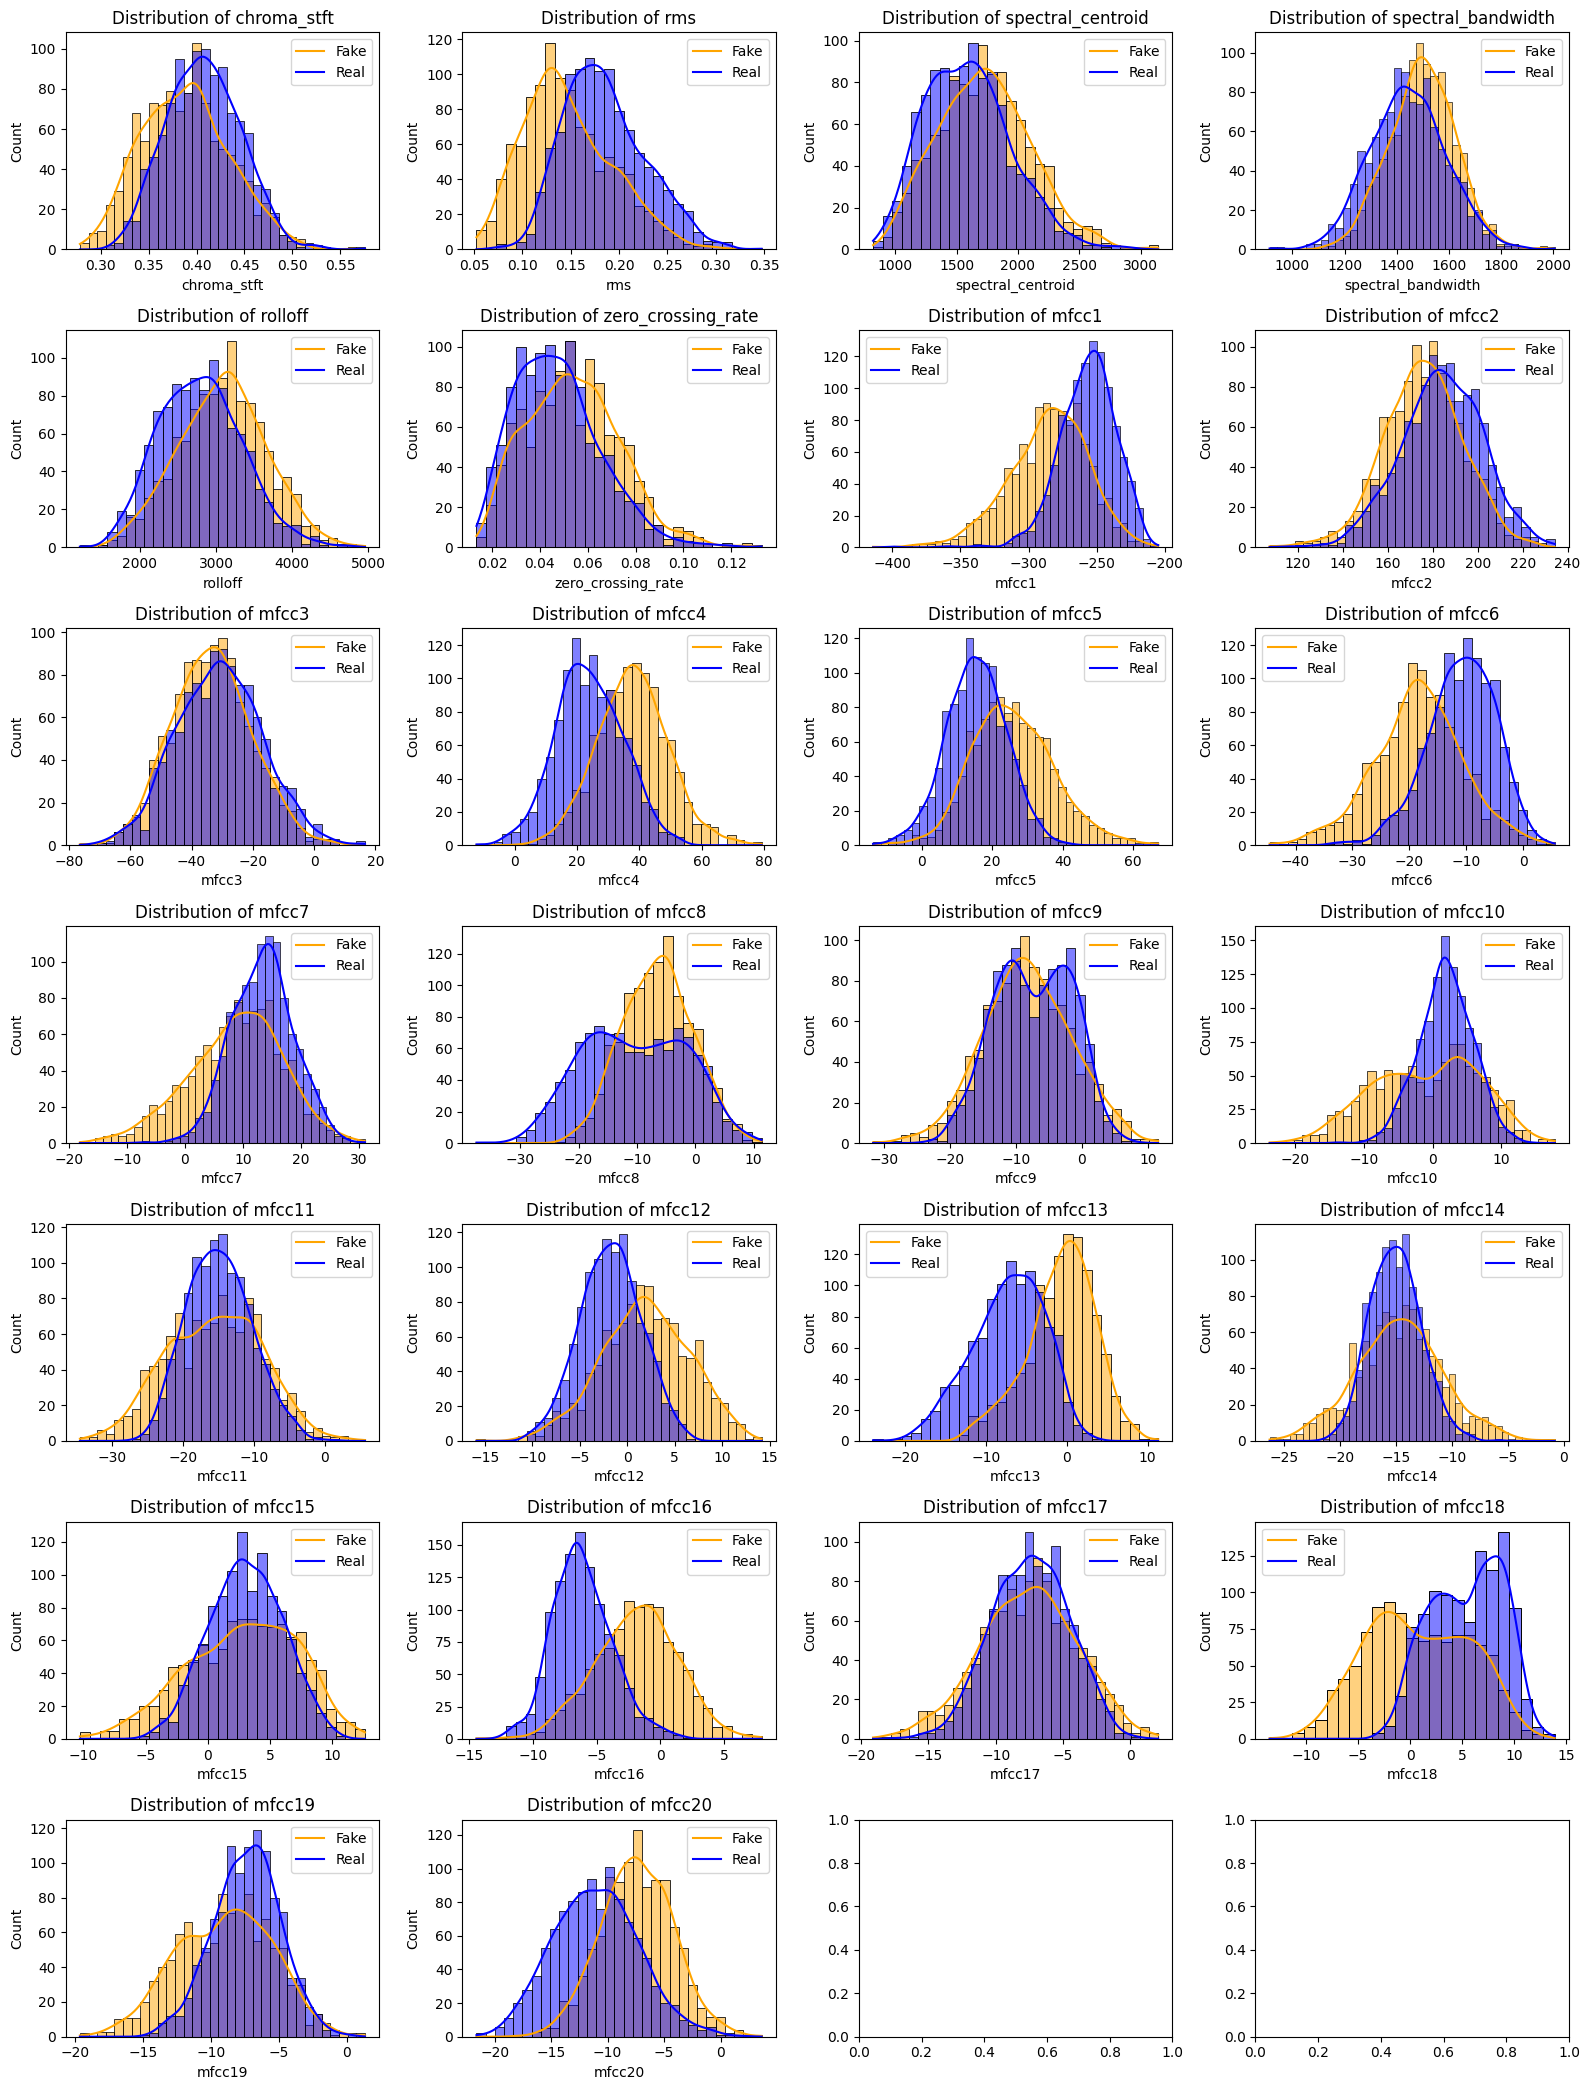

In [138]:
num_cols = len(X_for_test.columns)
nfig_per_row = 4
num_rows = (num_cols // nfig_per_row) + (num_cols % nfig_per_row > 0)

fig, axes = plt.subplots(num_rows, nfig_per_row, figsize=(nfig_per_row * 4, num_rows * 3))
axes = axes.flatten()

for i, column in enumerate(X_for_test):
    sns.histplot(data=df_for_test, x=column, hue='LABEL', kde=True, palette=['blue', 'orange'], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(labels=['Fake', 'Real'])

plt.tight_layout()
plt.show()

In [135]:
overlapping_samples = pd.DataFrame(X_for).apply(tuple, axis=1).isin(pd.DataFrame(X_for_test).apply(tuple, axis=1))
print(f"Number of overlapping samples: {overlapping_samples.sum()}")

Number of overlapping samples: 0


In [137]:
print(X_for_test.corrwith(y_for_test))

chroma_stft          -0.221272
rms                  -0.402628
spectral_centroid     0.180142
spectral_bandwidth    0.188944
rolloff               0.247700
zero_crossing_rate    0.174463
mfcc1                -0.497157
mfcc2                -0.222339
mfcc3                -0.092347
mfcc4                 0.532732
mfcc5                 0.456103
mfcc6                -0.482573
mfcc7                -0.317779
mfcc8                 0.257444
mfcc9                -0.072644
mfcc10               -0.226470
mfcc11               -0.061881
mfcc12                0.418587
mfcc13                0.605457
mfcc14                0.053496
mfcc15               -0.038271
mfcc16                0.601268
mfcc17               -0.022801
mfcc18               -0.481758
mfcc19               -0.262342
mfcc20                0.464403
dtype: float64


In [109]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_for, y_train_for)
print(f"Logistic Regression Accuracy: {lr.score(X_val_for, y_val_for)}")

Logistic Regression Accuracy: 1.0


In [110]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_for, y_train_for)
print(f"Dummy Classifier Accuracy: {dummy.score(X_val_for, y_val_for)}")

Dummy Classifier Accuracy: 0.5
